In [2]:
import numpy as np
from numpy import load
np.set_printoptions(suppress=True)
import pandas as pd

data = load('50_epoch_analysis_file.npy')

print(np.max(data[:,4]))
#7 children ; policy, yes/no action, Qe, Q, r, v, exp_r, exp_v, epoch, epoch, sims, actual action, game_step, state_NUM


2.357475370544889


In [3]:
dicky = {'policy': 0,'action':1, 'Qe':2, 'Q':4, 'r':6, 'v':8, 'exp_r':10 , 'exp_v':12, 'epoch':14, 'game_step': 17, 'rootnode_v':19,'n_step_returns':20}

In [4]:
import matplotlib.pyplot as plt

In [5]:
epoch_floor = 40
epoch_ceiling = 50
ef_floor = data[: , dicky['epoch']] > epoch_floor
ef_ceiling = data[:, dicky['epoch']] < epoch_ceiling
ef_all = ef_floor * ef_ceiling                        

a = data[ef_all]

game_step_ceiling = 50
gs_c = a[:, dicky['game_step']] < game_step_ceiling
a = a[gs_c]

normalize = False
x_column = dicky['Qe']
if normalize: x_column+=1
    
y_column = dicky['policy']
x = a[:, x_column]
mean_x = np.mean(x)
std_x = np.std(x)
filty = np.abs(x - mean_x) < 8*std_x
x = x[filty]
y = a[:, y_column][filty]


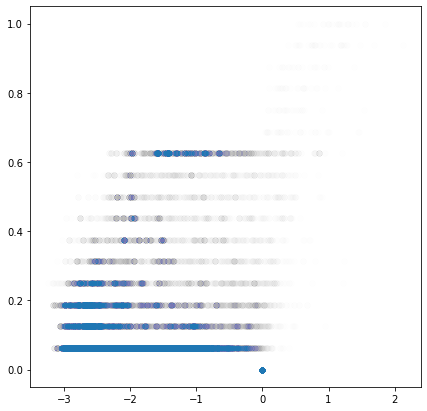

In [7]:
# Qe, Q, r, v, exp_r, exp_v
fig = plt.figure(figsize=(7,7))
plt.scatter(x, y, alpha=0.002); plt.show()

How often do we have no information

In [8]:
a.shape[0]

61929

In [476]:
listy = []
for i in range(0,a.shape[0],7):
    qe_avail = a[i:i+7,dicky['Qe']]
    qe_avail = np.where(qe_avail>0,qe_avail,0)
    qe_avail = np.sum(qe_avail)
    game_step = a[i:i+7, dicky['game_step']][0]
    listy.append([game_step, qe_avail])
    
    

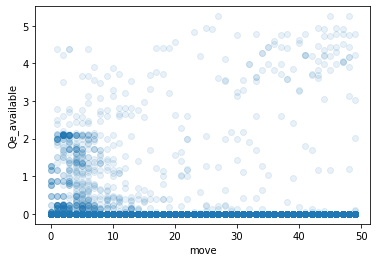

In [477]:
arrayy = np.array(listy)
plt.scatter(arrayy[:,0], arrayy[:,1],alpha = 0.1)
plt.xlabel('move')
plt.ylabel('Qe_available')
plt.show()

In [478]:
print("available moves: ", len(listy))
print("number of 0s: ",np.sum(arrayy[:,1]==0))

available moves:  11719
number of 0s:  10903
